In [1]:
from IPython.display import display, Image

In [2]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(np.__version__)
print(matplotlib.__version__)

1.20.1
3.3.4


In [5]:
# 설치가 안되어 있을 경우, 설치 필요.
import mglearn
import sklearn
print( sklearn.__version__)
print( mglearn.__version__)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

0.24.1
0.1.9


w[0]: 0.393906  b: -0.031804


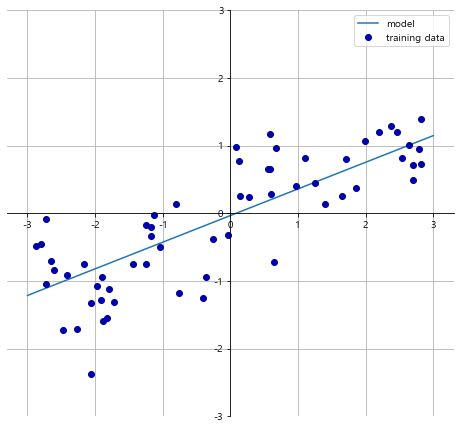

In [6]:
mglearn.plots.plot_linear_regression_wave()

### Boston 데이터 셋을 활용한 회귀 모델 만들어보기

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [8]:
boston = load_boston()
X = boston.data # 입력 데이터 - 문제
y = boston.target # 출력 데이터 - 답

### 데이터 살펴보기

In [9]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

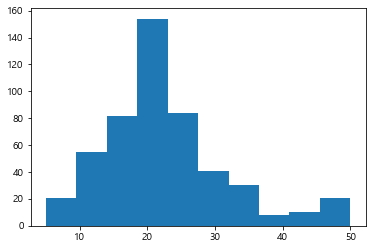

In [10]:
plt.hist(y)

### 데이터 준비하기

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
## model = 모델명()
## model.fit( 입력, 레이블(답) )
## pred = model.predict(새로운 데이터 입력)
model = LinearRegression() # 학습
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[0:10]

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346])

In [15]:
import pandas as pd

In [31]:
dict_dat = {'실제값':y_test, '예측값':pred, '오차':y_test-pred}
dat = pd.DataFrame(dict_dat)
dat.head()

,실제값,예측값,오차
0,23.6,28.838854,-5.238854
1,32.4,36.007833,-3.607833
2,13.6,15.083248,-1.483248
3,22.8,25.230909,-2.430909
4,16.1,18.878641,-2.778641


### MSE

In [32]:
dat['오차제곱'] = dat['오차'] * dat['오차']
mse_val = dat['오차제곱'].sum() / dat.shape[0]
mse_val

22.098694827097933

In [33]:
dat.head()

,실제값,예측값,오차,오차제곱
0,23.6,28.838854,-5.238854,27.445587
1,32.4,36.007833,-3.607833,13.016458
2,13.6,15.083248,-1.483248,2.200023
3,22.8,25.230909,-2.430909,5.909318
4,16.1,18.878641,-2.778641,7.720844


### MAE

In [34]:
dat['오차절대값'] = abs(dat['오차'])
mae = dat['오차절대값'].sum() / dat.shape[0]
mae

3.0609395954370147

In [35]:
dat.head()

,실제값,예측값,오차,오차제곱,오차절대값
0,23.6,28.838854,-5.238854,27.445587,5.238854
1,32.4,36.007833,-3.607833,13.016458,3.607833
2,13.6,15.083248,-1.483248,2.200023,1.483248
3,22.8,25.230909,-2.430909,5.909318,2.430909
4,16.1,18.878641,-2.778641,7.720844,2.778641


### RMSE

In [36]:
mse_val = dat['오차제곱'].sum() / dat.shape[0]
rmse = mse_val**(1/2)
rmse

4.700924890603756

### MSE

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

22.098694827097933

## 평가 지표
* MSE : (실제값 - 예측값)^2 전체합 / 데이터 개수 
* RMSE : MSE^(1/2)
* MAE : ㅣ실제값 - 예측값ㅣ 전체합 / 데이터 개수
* RMLSE : RMSE에 실제값과 예측값을 log 처리해 준것.
    * ( log(실제값+1) - lof(예측값+1) )

In [39]:
print("학습용 데이터에 대한 결정 계수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터에 대한 결정 계수 : {:.2f}".format(model.score(X_test, y_test)))

학습용 데이터에 대한 결정 계수 : 0.75
테스트 데이터에 대한 결정 계수 : 0.68


#### 2-8 (추가) test_size별 model.score를 구하기(8:2, 9:1, 7:3)-댓글

In [40]:
# 9:1
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=42)

In [41]:
model = LinearRegression() # 학습
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[0:10]

array([29.3639579 , 36.18916482, 14.05923305, 24.76681233, 18.79788306,
       23.24853399, 17.67925163, 13.52689687, 23.47852891, 20.64157306])

In [42]:
print("학습용 데이터에 대한 결정 계수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터에 대한 결정 계수 : {:.2f}".format(model.score(X_test, y_test)))

학습용 데이터에 대한 결정 계수 : 0.74
테스트 데이터에 대한 결정 계수 : 0.76


In [43]:
# 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [44]:
model = LinearRegression() # 학습
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("학습용 데이터에 대한 결정 계수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터에 대한 결정 계수 : {:.2f}".format(model.score(X_test, y_test)))

학습용 데이터에 대한 결정 계수 : 0.75
테스트 데이터에 대한 결정 계수 : 0.67


In [45]:
# 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [46]:
model = LinearRegression() # 학습
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("학습용 데이터에 대한 결정 계수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터에 대한 결정 계수 : {:.2f}".format(model.score(X_test, y_test)))

학습용 데이터에 대한 결정 계수 : 0.74
테스트 데이터에 대한 결정 계수 : 0.71


### 2-8 풀이

In [47]:
# 7:3 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)
model = LinearRegression().fit(X_train, y_train)
tr_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('학습용 : {}, 테스트용 : {}'.format(tr_score, test_score))

학습용 : 0.7434997532004697, 테스트용 : 0.7112260057484878


In [48]:
# 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
tr_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('학습용 : {}, 테스트용 : {}'.format(tr_score, test_score))

학습용 : 0.7508856358979673, 테스트용 : 0.6687594935356365


In [49]:
# 9:1
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.1, random_state=42)
model = LinearRegression().fit(X_train, y_train)
tr_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('학습용 : {}, 테스트용 : {}'.format(tr_score, test_score))

학습용 : 0.7375152736886281, 테스트용 : 0.7598135533532432


In [51]:
## 9:1, 8:2, 7:3, 6:4, 5:5
for i in range(1,6):
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=(i/10), random_state=42)
    model = LinearRegression().fit(X_train, y_train)
    tr_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f'학습용:테스트용 = {10-i}:{i}')
    print('학습용 : {}, 테스트용 : {}'.format(tr_score, test_score))

학습용:테스트용 = 9:1
학습용 : 0.7375152736886281, 테스트용 : 0.7598135533532432
학습용:테스트용 = 8:2
학습용 : 0.7508856358979673, 테스트용 : 0.6687594935356365
학습용:테스트용 = 7:3
학습용 : 0.7434997532004697, 테스트용 : 0.7112260057484878
학습용:테스트용 = 6:4
학습용 : 0.747199884740759, 테스트용 : 0.7125140936111214
학습용:테스트용 = 5:5
학습용 : 0.7719887864238001, 테스트용 : 0.6896917482875745


### 3-2 (추가) mse를 구하기

In [55]:
## 9:1, 8:2, 7:3, 6:4, 5:5
# MSE 값이 작고, 학습용 결정계수 크면서 테스트 결정계수와 큰 차이가 없는 자료분류가 적절.
# 9:1, 6:4 가 적합해 보인다.
for i in range(1,6):
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=(i/10), random_state=42)
    model = LinearRegression().fit(X_train, y_train)
    # 예측
    pred = model.predict(X_test)
    dict_dat = {'실제값':y_test, '예측값':pred, '오차':y_test-pred}
    dat = pd.DataFrame(dict_dat)
    # MSE 계산
    dat['오차제곱'] = dat['오차'] * dat['오차']
    mse_val = dat['오차제곱'].sum() / dat.shape[0]
    tr_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    # RMSE 계산
    rmse_val = mse_val ** 0.5
    # 데이터 분할 비율, 결정계수, MSE
    print(f'학습용:테스트용 = {10-i}:{i}')
    print('학습용 : {}, 테스트용 : {}'.format(tr_score, test_score))
    print(f'MSE : {mse_val}')
    print(f'RMSE : {rmse_val}')

학습용:테스트용 = 9:1
학습용 : 0.7375152736886281, 테스트용 : 0.7598135533532432
MSE : 14.995852876582909
RMSE : 3.8724479178657663
학습용:테스트용 = 8:2
학습용 : 0.7508856358979673, 테스트용 : 0.6687594935356365
MSE : 24.291119474973193
RMSE : 4.928602182665303
학습용:테스트용 = 7:3
학습용 : 0.7434997532004697, 테스트용 : 0.7112260057484878
MSE : 21.517444231177606
RMSE : 4.638689926172863
학습용:테스트용 = 6:4
학습용 : 0.747199884740759, 테스트용 : 0.7125140936111214
MSE : 21.832709989577502
RMSE : 4.672548554009632
학습용:테스트용 = 5:5
학습용 : 0.7719887864238001, 테스트용 : 0.6896917482875745
MSE : 25.175390536117042
RMSE : 5.017508399207424


# Lasso, Ridge 실습

In [153]:
import mglearn

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures # PolynomialFeatures : 새로운 특성을 만들어 낸다.

import pandas as pd

In [154]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

### 데이터 프레임으로 만들기

In [155]:
boston = load_boston()
print(type(boston.data), type(boston.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [156]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['price'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [157]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 회귀 분석

In [158]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [159]:
# 입력과 출력 : X, y
X = df_boston.loc[:, 'CRIM':'LSTAT']
y = df_boston['price']
print(X.shape, y.shape)

(506, 13) (506,)


### 데이터 정규화
* 데이터의 값의 범위 => 0-1 사이로 변환

In [160]:
print(df_boston['CRIM'].min(), df_boston['CRIM'].max())
print(df_boston['NOX'].min(), df_boston['NOX'].max())
print(df_boston['INDUS'].min(), df_boston['INDUS'].max())

0.00632 88.9762
0.385 0.871
0.46 27.74


In [161]:
# 정규화
nor_X = MinMaxScaler().fit_transform(X)
print(type(nor_X))
print(np.min(nor_X[0]), np.max(nor_X[0]))
print(np.min(nor_X[1]), np.max(nor_X[1]))

<class 'numpy.ndarray'>
0.0 0.9999999999999999
0.0 0.9999999999999999


### 많은 특성 생성

In [163]:
print(X.shape, y.shape)

(506, 13) (506,)


In [164]:
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(nor_X)

print(ex_X.shape, y.shape)

(506, 104) (506,)


In [169]:
# LinearRegression회귀 모델 적용
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)

ex_model = LinearRegression().fit(X_train, y_train)
# 과대적합 발생
print(ex_model.score(X_train, y_train))
print(ex_model.score(X_test, y_test))

0.9448313975211592
0.7758378393351775


In [170]:
# Lasso회귀 모델 적용
lasso_model = Lasso(alpha=0.01).fit(X_train, y_train)
print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.8865033777946089
0.8035922576420698


C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8481333641557285, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [171]:
# Ridge회귀 모델 적용
ridge_model = Ridge(alpha=0.01).fit(X_train, y_train)
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

0.9357645261988821
0.8144760713008234


#### 4-7 Lasso, Ridge의 가장 좋은 alpha 값과 그때의 결과 출력 - 댓글

In [172]:
# Lasso
alpha = []
train_score = []
test_score = []
for a in range(1,11):
    d = 10 ** a
    lasso_model = Lasso(alpha=1/d).fit(X_train, y_train)
    alpha.append(1/d)
    train_score.append(lasso_model.score(X_train, y_train))
    test_score.append(lasso_model.score(X_test, y_test))
    print(f'Lasso Alpha = {1/d}')
    print(lasso_model.score(X_train, y_train))
    print(lasso_model.score(X_test, y_test))
    print()

Lasso Alpha = 0.1
0.7471467575228325
0.6986891802234085

Lasso Alpha = 0.01
0.8865033777946089
0.8035922576420698

Lasso Alpha = 0.001
0.9296864690381806
0.8141500652221195

Lasso Alpha = 0.0001
0.937433072538205
0.7764741268470525

Lasso Alpha = 1e-05
0.9377934581406826
0.7588385308697614



C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8481333641557285, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864.3796550249897, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471491, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

Lasso Alpha = 1e-06
0.9378835586212978
0.758748228969544

Lasso Alpha = 1e-07
0.9378868418808644
0.7588603652564908

Lasso Alpha = 1e-08
0.9378870184537398
0.7588712710503821

Lasso Alpha = 1e-09
0.9378870346323096
0.7588723595141612

Lasso Alpha = 1e-10
0.9378870362353142
0.7588724683357471



C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1043.879054642427, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1043.8259648090723, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1043.8206310906562, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

<AxesSubplot:>

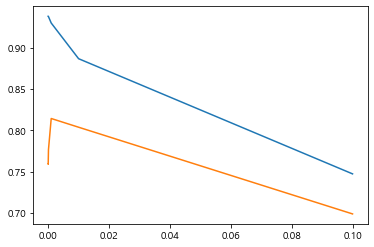

In [173]:
import seaborn as sns
# lasso train
sns.lineplot(x=alpha, y=train_score)
# lasso test
sns.lineplot(x=alpha, y=test_score)

In [174]:
# Ridge
r_alpha = []
r_train_score = []
r_test_score = []
for a in range(1,11):
    d = 10 ** a
    ridge_model = Ridge(alpha=1/d).fit(X_train, y_train)
    r_alpha.append(1/d)
    r_train_score.append(ridge_model.score(X_train, y_train))
    r_test_score.append(ridge_model.score(X_test, y_test))
    print(f'Ridge Alpha = {1/d}')
    print(ridge_model.score(X_train, y_train))
    print(ridge_model.score(X_test, y_test))
    print()

Ridge Alpha = 0.1
0.9174870139232206
0.824649187531465

Ridge Alpha = 0.01
0.9357645261988821
0.8144760713008234

Ridge Alpha = 0.001
0.9433698748903485
0.806037499405526

Ridge Alpha = 0.0001
0.9443664169210898
0.7883384563739017

Ridge Alpha = 1e-05
0.9446636823847012
0.779841430062861

Ridge Alpha = 1e-06
0.9447831093919923
0.777068914235134

Ridge Alpha = 1e-07
0.9448295349841365
0.7760634890093735

Ridge Alpha = 1e-08
0.9448313746736842
0.7758627770327594

Ridge Alpha = 1e-09
0.9448313972876858
0.7758403599606468

Ridge Alpha = 1e-10
0.9448313975188195
0.7758380916694559



<AxesSubplot:>

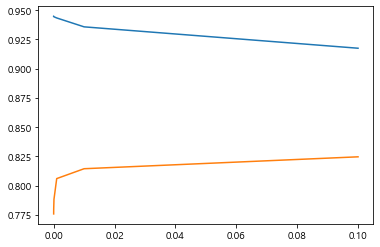

In [175]:
import seaborn as sns
# ridge train
sns.lineplot(x=r_alpha, y=r_train_score)
# ridge test
sns.lineplot(x=r_alpha, y=r_test_score)

### Lasso regression - w값을 0으로 가까이, 0이 되기도 한다.

In [178]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))

학습용 데이터 세트 점수 : 0.27
테스트 데이터 세트 점수 : 0.26
사용한 특성의 수 :  102


In [179]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.78
사용한 특성의 수 :  102


C:\Users\kbjoo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471491, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [180]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso001.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso001.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0))

학습용 데이터 세트 점수 :  0.8864717420585478
테스트 데이터 세트 점수 :  0.8036004116583613
사용한 특성의 수 :  34


In [181]:
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso01.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso01.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso01.coef_ != 0))

학습용 데이터 세트 점수 :  0.7471467575228325
테스트 데이터 세트 점수 :  0.6986891802234085
사용한 특성의 수 :  12


In [182]:
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : ",lasso10.score(X_train, y_train))
print("테스트 데이터 세트 점수 : ",lasso10.score(X_test, y_test))
print("사용한 특성의 수 : ", np.sum(lasso10.coef_ != 0))

학습용 데이터 세트 점수 :  0.0
테스트 데이터 세트 점수 :  -0.03189647654769301
사용한 특성의 수 :  0


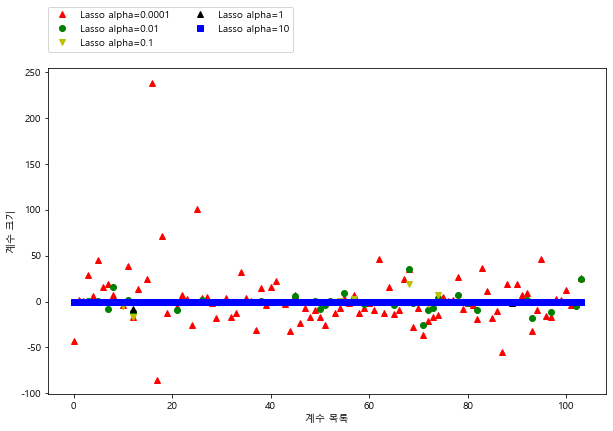

In [183]:
# 그래프
lasso = Lasso(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(10,6))
plt.plot(lasso00001.coef_, "r^", label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(lasso01.coef_, 'yv', label="Lasso alpha=0.1")
plt.plot(lasso.coef_, 'k^', label="Lasso alpha=1")
plt.plot(lasso10.coef_, "bs", label="Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
# plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()

### Ridge Regression - w 값을 0으로 가깝게 만든다.

In [184]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge10.coef_ != 0))

학습용 데이터 세트 점수 : 0.77
테스트 데이터 세트 점수 : 0.73
사용한 특성의 수 :  104


In [185]:
ridge = Ridge(alpha=1).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge.coef_ != 0))

학습용 데이터 세트 점수 : 0.87
테스트 데이터 세트 점수 : 0.81
사용한 특성의 수 :  104


In [186]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge01.coef_ != 0))

학습용 데이터 세트 점수 : 0.92
테스트 데이터 세트 점수 : 0.82
사용한 특성의 수 :  104


In [187]:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(ridge001.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(ridge001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge001.coef_ != 0))

학습용 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.81
사용한 특성의 수 :  104


In [188]:
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(ridge0001.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(ridge0001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge0001.coef_ != 0))

학습용 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.81
사용한 특성의 수 :  104


In [189]:
ridge00001 = Ridge(alpha=0.0001).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(ridge00001.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(ridge00001.score(X_test, y_test)))
print("사용한 특성의 수 : ", np.sum(ridge00001.coef_ != 0))

학습용 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.79
사용한 특성의 수 :  104


### 그래프 그리기

In [190]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge = Ridge(alpha=1).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
ridge00001 = Ridge(alpha=0.0001).fit(X_train, y_train)

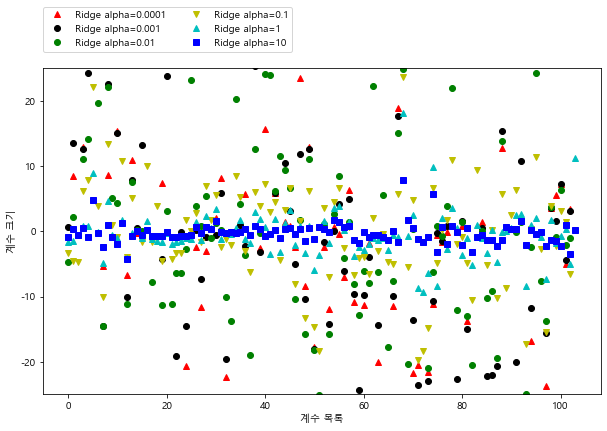

In [191]:
# 그래프
ridge = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(10,6))
plt.plot(ridge00001.coef_, "r^", label="Ridge alpha=0.0001")
plt.plot(ridge0001.coef_, 'ko', label="Ridge alpha=0.001")
plt.plot(ridge001.coef_, 'go', label="Ridge alpha=0.01")
plt.plot(ridge01.coef_, 'yv', label="Ridge alpha=0.1")
plt.plot(ridge.coef_, 'c^', label="Ridge alpha=1")
plt.plot(ridge10.coef_, "bs", label="Ridge alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()